### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [2]:
!pip install numpy-financial

In [3]:
import numpy_financial as npf

### Import Dataset

In [4]:
sp = pd.read_csv("../input/sp100/sector.txt")
sp.head()

,Name,Sector,Price,EPS
0,Apple Inc,Information Technology,170.12,9.20
1,Abbvie Inc,Health Care,93.29,5.31
2,Abbott Laboratories,Health Care,55.28,2.41
3,Accenture Plc,Information Technology,145.30,5.91
4,Allergan Plc,Health Care,171.81,15.42


**Sectors of companies within S&P500 in 2017**

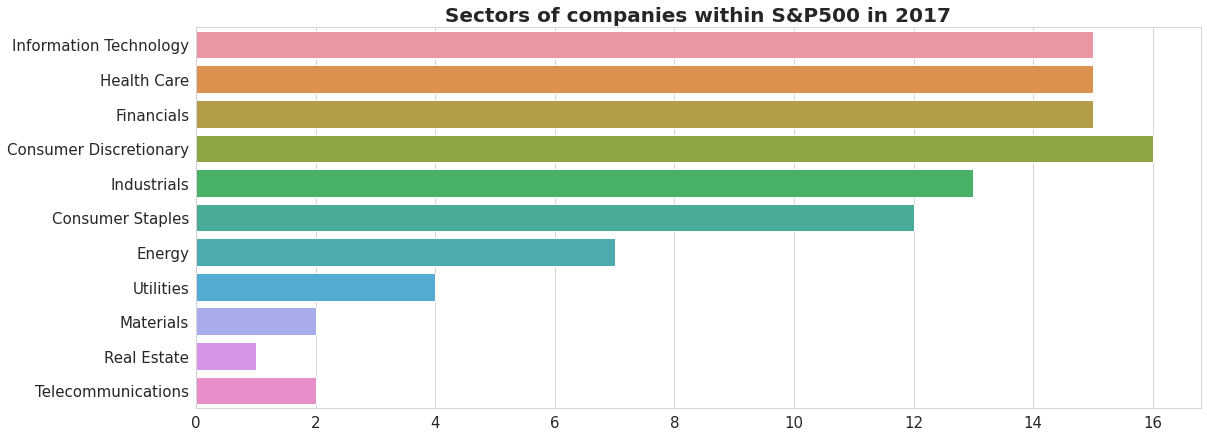

In [5]:
plt.figure(figsize = (18, 7))
sns.countplot(y = sp["Sector"])
plt.title("Sectors of companies within S&P500 in 2017", weight = "bold", size = 20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Price to Earning Ratio by Company**

In [6]:
sp["P/E Ratio"] = sp["Price"] / sp["EPS"]
sp.head()

,Name,Sector,Price,EPS,P/E Ratio
0,Apple Inc,Information Technology,170.12,9.20,18.491304
1,Abbvie Inc,Health Care,93.29,5.31,17.568738
2,Abbott Laboratories,Health Care,55.28,2.41,22.937759
3,Accenture Plc,Information Technology,145.30,5.91,24.585448
4,Allergan Plc,Health Care,171.81,15.42,11.142023


**Histogram of P/E Ratio**

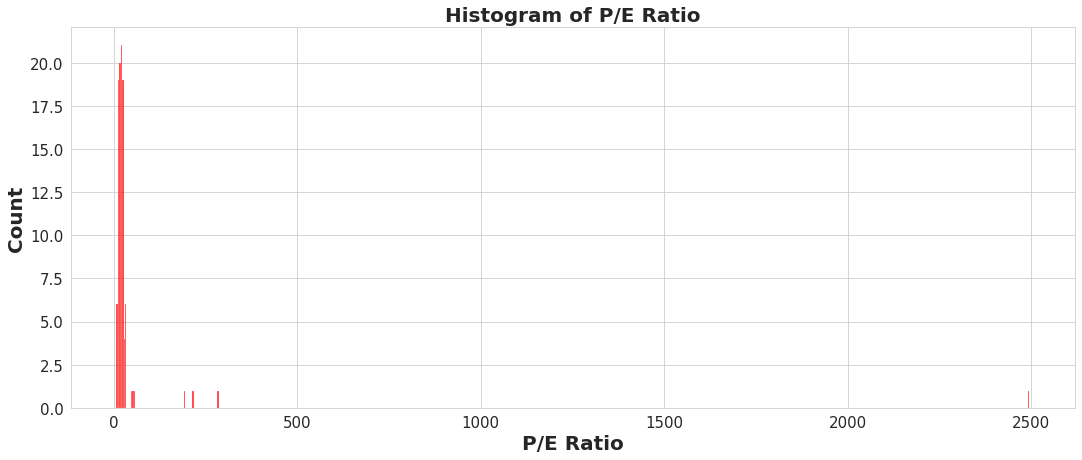

In [7]:
plt.figure(figsize = (18, 7))
sns.histplot(sp["P/E Ratio"], color = "red")
plt.title("Histogram of P/E Ratio", size = 20, weight = "bold")
plt.xlabel("P/E Ratio", weight = "bold", size = 20)
plt.ylabel("Count", weight = "bold",  size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Remove Outliers**

In [8]:
mask = sp['P/E Ratio'] > 50
sp = sp[~mask]

**Histogram of P/E Ratio without Outliers**

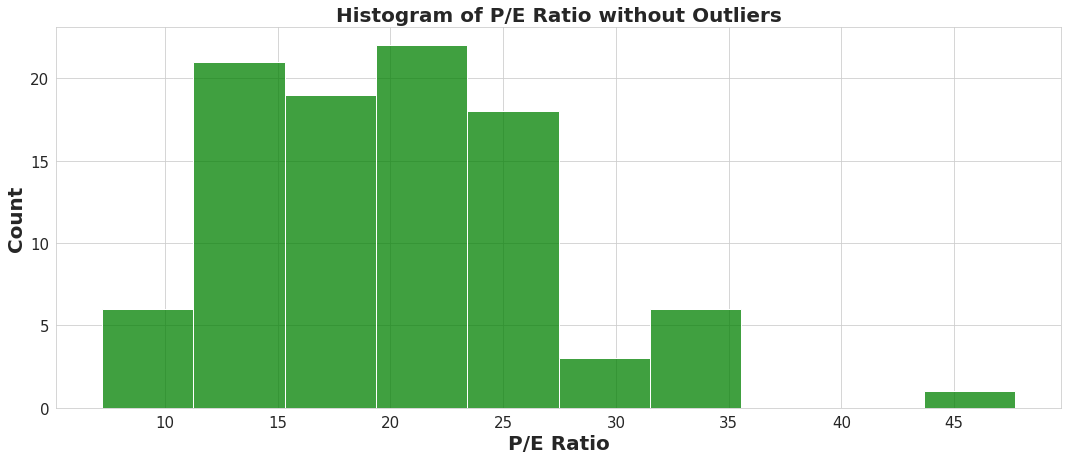

In [9]:
plt.figure(figsize = (18, 7))
sns.histplot(sp["P/E Ratio"], color = "green")
plt.title("Histogram of P/E Ratio without Outliers", size = 20, weight = "bold")
plt.xlabel("P/E Ratio", weight = "bold", size = 20)
plt.ylabel("Count", weight = "bold",  size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Top 10 Price to Earning Ratio by Company**

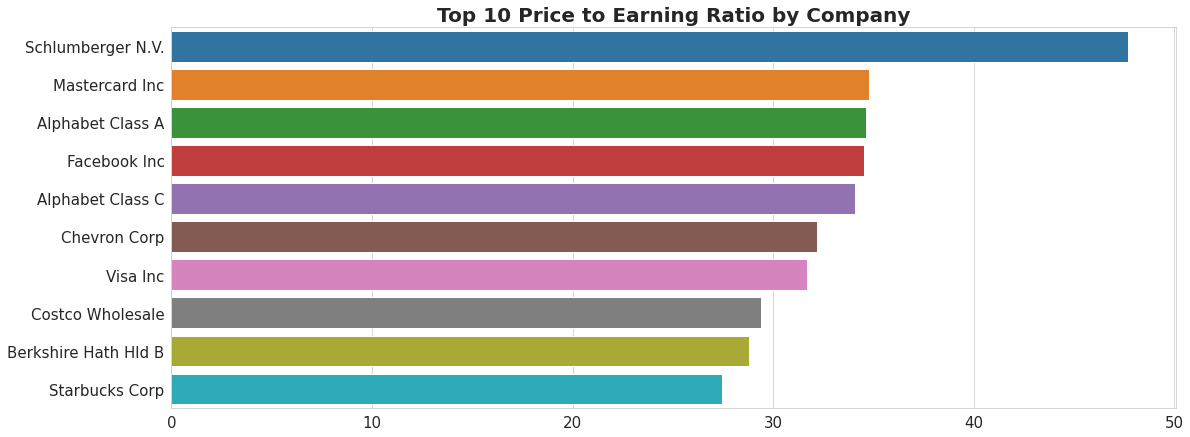

In [10]:
top_com_pe = sp.sort_values(by = "P/E Ratio", ascending = False)
top_com_pe_10 = top_com_pe.head(10)

plt.figure(figsize = (18, 7))
sns.barplot(y = "Name", x = "P/E Ratio", data = top_com_pe_10)
plt.title("Top 10 Price to Earning Ratio by Company", weight = "bold", size = 20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Average and Standard Deviation of Price to Earning Ratio by Sector**

In [11]:
sp.groupby("Sector")["P/E Ratio"].agg(["mean", "std"])

,mean,std
Sector,,
Consumer Discretionary,18.180602,6.640417
Consumer Staples,21.581069,4.608206
Energy,32.160029,11.089594
Financials,16.124468,5.050263
Health Care,16.932835,4.629821
Industrials,21.613948,3.758624
Information Technology,24.308376,8.367696
Materials,20.402104,1.372367
Real Estate,26.322314,NaN


### Import Stocks Data

In [12]:
stocks = pd.read_csv("../input/stocks/HistoricalQuotes.csv")
stocks.head()

,date,close,volume,open,high,low
0,13:33,"1,155.14","1,145,529","1,172","1,176.88","1,152"
1,2019/08/02,1196.3200,1745450.0000,1203.0000,1209.5000,1190.0000
2,2019/08/01,1211.7800,1771271.0000,1217.6300,1236.2980,1207.0000
3,2019/07/31,1218.2000,1997999.0000,1224.8700,1234.9100,1208.1800
4,2019/07/30,1228.0000,1430775.0000,1227.0000,1236.9100,1225.3200


**Fundamental Financial Concepts**

In [13]:
year1_investment = 10000

year2_investment_worth = 11000

gain = ((year2_investment_worth - year1_investment) / year1_investment) * 100

print("Annual Return =", str(gain) + "%")

Annual Return = 10.0%


**Return on Investment**

In [14]:
initial_value_investment = 10000

return_rate = 0.10

final_value_investment = initial_value_investment * (1 + return_rate)

print("Final Investment Value =", final_value_investment)

Final Investment Value = 11000.0


**Commulative Growth**

In [15]:
initial_investment = 10000

return_rate = 0.06

period = 30

future_investment_value = initial_investment * (1 + return_rate) ** period

print("Commulative Growth =", np.round(future_investment_value)) 

Commulative Growth = 57435.0


**Discount Factors and Depreciation**

In [16]:
initial_investment = 10000

growth_rate = -0.03

period = 10

future_value = initial_investment * ( 1 + growth_rate) ** period

print("Future Value after Depreciation =", np.round(future_value))

Future Value after Depreciation = 7374.0


**Discount Factor**

In [17]:
discount_factor = 1 / ((1 + growth_rate) ** period)
print("Discount Factor = ", np.round(discount_factor, 2))

Discount Factor =  1.36


**Initial Investment Value**

In [18]:
initial_investment_value = future_value * discount_factor
print("Initial Investment Value =", np.round(initial_investment_value))

Initial Investment Value = 10000.0


**Compute the present value of an investment which will yield $10,000 15 years from now at an inflation rate of 3% per year**

In [19]:
pvi = npf.pv(rate = 0.03, nper = 15, pmt = 0, fv = 10000).round(2)
print("Investment is worth", -pvi, "in today's dollars")

Investment is worth 6418.62 in today's dollars


**Future Value**

In [20]:
initial_investment = 10000
return_rate = 0.08
period = 10


future_value = initial_investment * (1 + return_rate) ** 10
print("Investment of 10000 dollars will yield a total of", np.round(future_value, 2), "dollars in 3 years")

Investment of 10000 dollars will yield a total of 21589.25 dollars in 3 years


**Present Value**

In [21]:
present_value = npf.pv(rate = 0.03, nper = 10, pmt = 0, fv = -future_value)
print("After adjusting for inflation, investment is worth", np.round(present_value, 2), "dollars in todays dollars")

After adjusting for inflation, investment is worth 16064.43 dollars in todays dollars


**Discounting cash flows**

In [22]:
cash_flows = np.array([100, 100, 100, 100, 100])

investment_1 = npf.npv(rate = 0.03, values = cash_flows)
print("Investment_1 net present value is", np.round(investment_1, 2), "dollars", "\n")

investment_2 = npf.npv(rate = 0.05, values = cash_flows)
print("Investment_2 net present value is", np.round(investment_2, 2), "dollars")

Investment_1 net present value is 471.71 dollars 

Investment_2 net present value is 454.6 dollars


**Initial project costs**

In [23]:
cash_flows_1 = np.array([-250, 100, 200, 300, 400])

cash_flows_2 = np.array([-250, 300, -250, 300, 300])

investment_1 = npf.npv(rate = 0.03, values = cash_flows_1)

investment_2 = npf.npv(rate = 0.03, values = cash_flows_2)

print("Net present value of inevestment_1 is worth $" + str(np.round(investment_1, 2)), "in today's dollars", "\n")

print("Net present value of investment_2 is worth $" + str(np.round(investment_2, 2)), "in today's dollars")

Net present value of inevestment_1 is worth $665.54 in today's dollars 

Net present value of investment_2 is worth $346.7 in today's dollars


**Diminishing cash flows**

In [24]:
inflation_rate = 0.03
future_value = 100
period = 30

investment = npf.pv(rate = inflation_rate,
                    nper = period,
                    pmt = 0,
                    fv = -future_value)

print("Investment is worth $" + str(np.round(investment)), "in today's dollars")

Investment is worth $41.0 in today's dollars


**Project Proposals and Cash Flows Projections**

In [25]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-1000, 200, 250, 300, 350, 400, 450, 500, 550, 600])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-1000, 150, 225, 300, 375, 425, 500, 575, 600, 625])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000

cf_project2 = cf_project_2 * 1000

In [26]:
# Calculate the internal rate of return for Project 1
irr_project1 = npf.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%", "\n")

# Calculate the internal rate of return for Project 2
irr_project2 = npf.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

Project 1 IRR: 28.92% 

Project 2 IRR: 28.78%


**Debt and equity financing**

In [27]:
# Set the market value of debt
mval_debt = 1000000

# Set the market value of equity
mval_equity = 1000000

# Compute the total market value of your company's financing
mval_total = mval_debt + mval_equity

# Compute the proportion of your company's financing via debt
percent_debt = mval_debt / mval_total
print("Debt Financing: " + str(round(100*percent_debt, 2)) + "%")

# Compute the proportion of your company's financing via equity
percent_equity = mval_equity / mval_total
print("Equity Financing: " + str(round(100*percent_equity, 2)) + "%")

Debt Financing: 50.0%
Equity Financing: 50.0%


**Calculating WACC**

In [28]:
# The proportion of debt vs equity financing is predefined
percent_debt = 0.50
percent_equity = 0.50

# Set the cost of equity
cost_equity = 0.18

# Set the cost of debt
cost_debt = 0.12

# Set the corporate tax rate
tax_rate = 0.35

# Calculate the WACC
wacc = (percent_equity*cost_equity) + (percent_debt*cost_debt) * (1 - tax_rate)
print("WACC: " + str(round(100*wacc, 2)) + "%")

WACC: 12.9%


**Comparing project NPV with IRR**

In [29]:
# Set your weighted average cost of capital equal to 12.9%
wacc = 0.129

# Calculate the net present value for Project 1
npv_project1 = npf.npv(wacc, cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the net present value for Project 2
npv_project2 = npf.npv(wacc, cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 NPV: 856073.18
Project 2 NPV: 904741.35


**Two project with different lifespans**

In [30]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-700, 100, 150, 200, 250, 300, 350, 400])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-400, 50, 100, 150, 200, 250, 300])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000

**Internal Rate of Return**

In [31]:
# Calculate the IRR for Project 1
irr_project1 = npf.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the IRR for Project 2
irr_project2 = npf.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

Project 1 IRR: 22.94%
Project 2 IRR: 26.89%


**Net Present Value**

In [32]:
# Set the wacc equal to 12.9%
wacc = 0.129

# Calculate the NPV for Project 1
npv_project1 = npf.npv(wacc, cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the NPV for Project 2
npv_project2 = npf.npv(wacc, cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 NPV: 302744.98
Project 2 NPV: 231228.39


In [33]:
# Calculate the EAA for Project 1
eaa_project1 = npf.pmt(rate=wacc, nper=8, pv=-npv_project1, fv=0)
print("Project 1 EAA: " + str(round(eaa_project1, 2)))

# Calculate the EAA for Project 2
eaa_project2 = npf.pmt(rate=wacc, nper=7, pv=-npv_project2, fv=0)
print("Project 2 EAA: " + str(round(eaa_project2, 2)))

Project 1 EAA: 62872.2
Project 2 EAA: 52120.61


### Salary and Taxes

In [34]:
salary = 85000

taxes = 0.3

salary_after_taxes = salary * (1 - taxes)

monthly_takehome_salary = salary_after_taxes / 12

print("Salary after taxes = $" + str(np.round(salary_after_taxes, 2)), "\n")

print("Monthly Salary after taxes $" + str(np.round(monthly_takehome_salary)))

Salary after taxes = $59500.0 

Monthly Salary after taxes $4958.0


**Monthly expenses and savings**

In [35]:
# Enter your monthly rent
monthly_rent = 1200

# Enter your daily food budget
daily_food_budget = 30 

# Calculate your monthly food budget assuming 30 days per month
monthly_food_budget = 30 * 30

# Set your monthly entertainment budget
monthly_entertainment_budget = 200

# Allocate funds for unforeseen expenses, just in case
monthly_unforeseen_expenses = 250

# Next, calculate your total monthly expenses
monthly_expenses = monthly_rent + monthly_food_budget + monthly_entertainment_budget + monthly_unforeseen_expenses
print("Monthly expenses: $" + str(round(monthly_expenses, 2)))

# Finally, calculate your monthly take-home savings
monthly_savings = (salary_after_taxes / 12) - monthly_expenses
print("Monthly savings: $" + str(round(monthly_savings, 2)))

Monthly expenses: $2550
Monthly savings: $2408.33


**Forecast salary growth and cost of living**

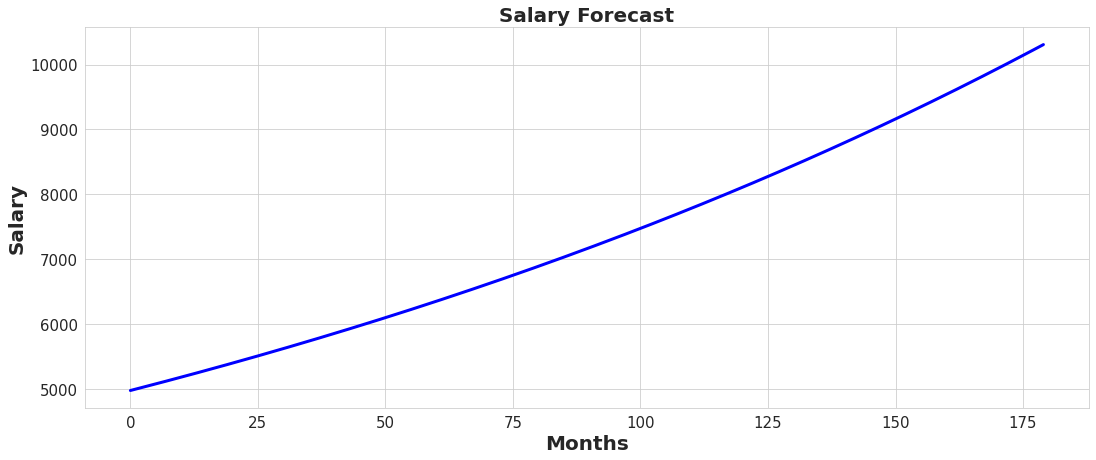

In [36]:
forecast_months = 12*15

annual_salary_growth = 0.05

monthly_salary_growth = (1 + annual_salary_growth) ** (1/12) - 1

commulative_salary_growth_forecast = np.cumprod(np.repeat(1 + monthly_salary_growth, forecast_months))

salary_forecast = monthly_takehome_salary * commulative_salary_growth_forecast

plt.figure(figsize = (18, 7))
plt.plot(salary_forecast, color = "blue", linewidth = 3)
plt.title("Salary Forecast", size = 20, weight = "bold")
plt.xlabel("Months", size = 20, weight = "bold")
plt.ylabel("Salary", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Forecast growing expenses due to inflation**

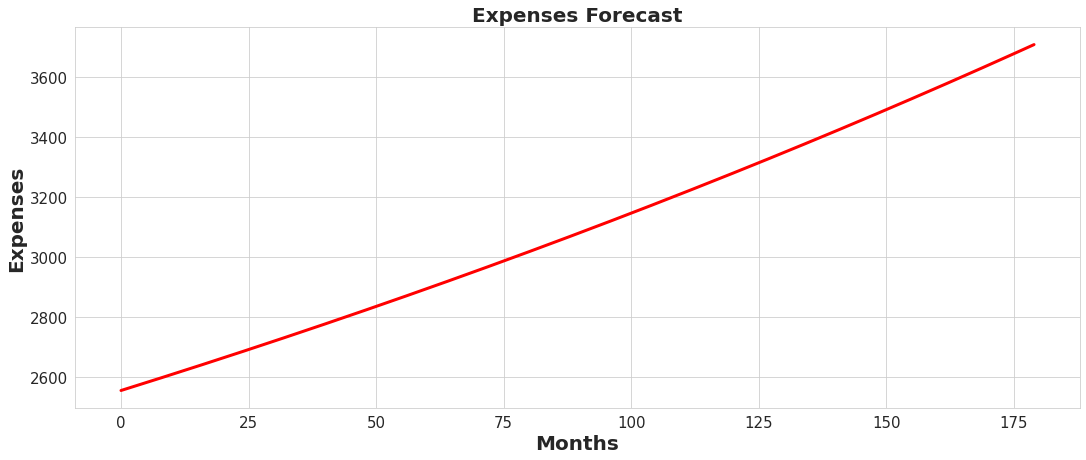

In [37]:
annual_inflation = 0.025

monthly_inflation = 0.025 / 12

commulative_inflation_forecast = np.cumprod(np.repeat(1 + monthly_inflation, forecast_months))

expenses_forecast = monthly_expenses * commulative_inflation_forecast

plt.figure(figsize = (18, 7))
plt.plot(expenses_forecast, color = "red", linewidth = 3)
plt.title("Expenses Forecast", size = 20, weight = "bold")
plt.xlabel("Months", size = 20, weight = "bold")
plt.ylabel("Expenses", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Salary and Expenses Forecasting**

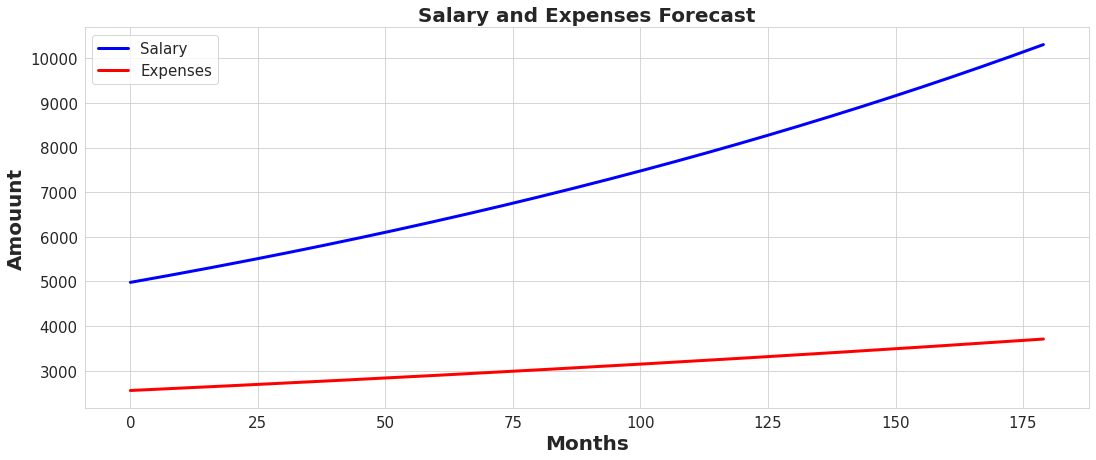

In [38]:
plt.figure(figsize = (18, 7))
plt.plot(salary_forecast, color = "blue", linewidth = 3, label = "Salary")
plt.plot(expenses_forecast, color = "red", linewidth = 3, label = "Expenses")
plt.title("Salary and Expenses Forecast", size = 20, weight = "bold")
plt.xlabel("Months", size = 20, weight = "bold")
plt.ylabel("Amouunt", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(fontsize = 15)
plt.show()

**Calculate Net Worth**

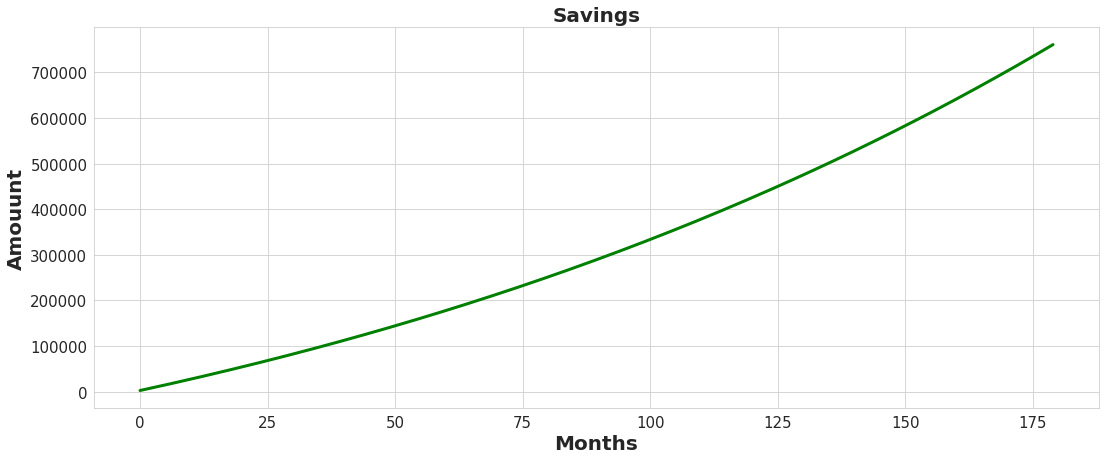

In [39]:
savings_forecast = salary_forecast - expenses_forecast

commulative_savings = np.cumsum(savings_forecast)

plt.figure(figsize = (18, 7))
plt.plot(commulative_savings, color = "green", linewidth = 3)
plt.title("Savings", size = 20, weight = "bold")
plt.xlabel("Months", size = 20, weight = "bold")
plt.ylabel("Amouunt", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Become a Millonaire**

In [40]:
investment_rate_annual = 0.07

investment_rate_monthly = (1 + investment_rate_annual) ** (1/12) - 1

required_investment_monthly = -npf.pmt(rate = investment_rate_monthly,
                                      nper = 15 * 12,
                                      pv = 0,
                                      fv = 1000000)
print("You will have to invest $" + 
      str(round(required_investment_monthly, 2)) + 
      " per month to amass $1M over 15 years")

You will have to invest $3214.35 per month to amass $1M over 15 years


**Investment and Savings**

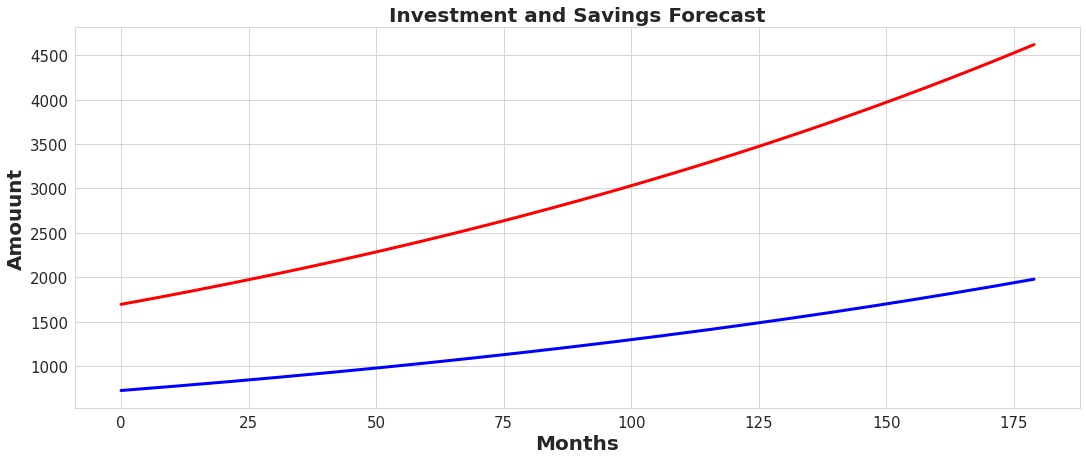

In [41]:
investment_account = savings_forecast * 0.3

savings_account = savings_forecast * (1 - 0.3)

cumulative_savings_account = np.cumsum(savings_account)

plt.figure(figsize = (18, 7))
plt.plot(investment_account, color = "blue", linewidth = 3, label = "Investment")
plt.plot(savings_account, color = "red", linewidth = 3, label = "Savings")
plt.title("Investment and Savings Forecast", size = 20, weight = "bold")
plt.xlabel("Months", size = 20, weight = "bold")
plt.ylabel("Amouunt", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [42]:
forecast_months = 12 * 15
investment_portfolio = np.repeat(0, forecast_months)
net_worth = np.repeat(0, forecast_months)
investment_rate_monthly = 0.07 / 12

# Loop through each forecast period
for i in range(forecast_months):
    
    # Find the previous investment deposit amount
    if i == 0: 
        previous_investment = 0
    else:
        previous_investment = investment_portfolio[i-1]
        
    # Calculate the value of your previous investments, which have grown
    previous_investment_growth = previous_investment*(1 + investment_rate_monthly)
    
    # Add your new deposit to your investment portfolio
    investment_portfolio[i] =  previous_investment_growth + investment_account[i]
    
    # Calculate your net worth at each point in time
    net_worth[i] = investment_portfolio[i] + cumulative_savings_account[i]

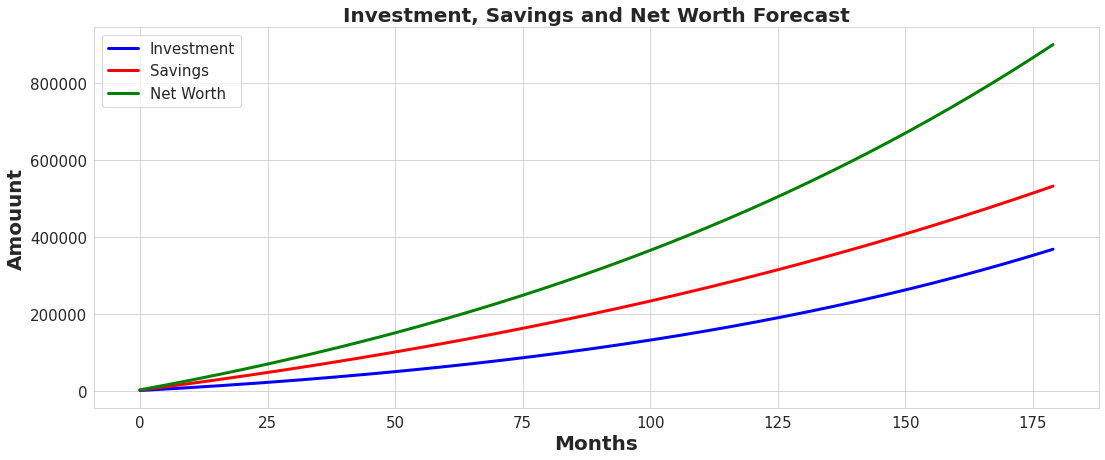

In [43]:
plt.figure(figsize = (18, 7))
plt.plot(investment_portfolio, color = "blue", linewidth = 3, label = "Investment")
plt.plot(cumulative_savings_account, color = "red", linewidth = 3, label = "Savings")
plt.plot(net_worth, color = "green", linewidth = 3, label = "Net Worth")
plt.title("Investment, Savings and Net Worth Forecast", size = 20, weight = "bold")
plt.xlabel("Months", size = 20, weight = "bold")
plt.ylabel("Amouunt", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(fontsize = 15)
plt.show()